<a href="https://colab.research.google.com/github/LucasLessa1/ComputerVision/blob/main/Lista_01_PDI_Lucas_Lessa_190126230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Lista 01 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André Costa e Sana Alamgeer


---



## **Problema 1**: Interpolação

**1.1.** 

> Desenvolva uma função em Python para reduzir ou aumentar a resolução espacial de uma imagem por um fator *n*. O fator *n* deve ser fornecido à função pelo usuário e a função deve ser implementada utilizando o algoritmo de interpolação **vizinho-mais-próximo**. 

> Escolha uma imagem com resolução mínima de 512x512 e utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16.  Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original.  Visualize todas as imagens obtidas e comente sobre as diferenças de qualidade entre elas. 

> Utilizando a função em Python abaixo, que calcula a relação sinal ruído de pico (PSNR - peak-signal-to-noise-ratio) entre duas imagens, calcule o PSNR entre a imagens originais e as imagens aumentadas (após a redução). 

> Opcional: Faça um gráfico dos valores de PSNR versus o tamanho da redução de resolução (2, 4, 8 e 16). 




###Importando as bibliotecas.

In [1]:
import gdown
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2
import math
import numpy as np

In [2]:
#Essa biblioteca nos permite baixar arquivos pelo link no drive, com isso qualquer pessoa (mesmo sem acesso ao drive)
#pode rodar o notebook.

def download(id):
  url = 'https://drive.google.com/uc?id=' + str(id)
  gdown.download(url, output = None, quiet = False)


# download('1PKYmrdjynPBs_oA8E7lMvT9URpuReI8c')   #Imagem de lennaMetade.png

###Escolhendo e baixando imagem.

In [3]:
##Image do Jordan -->https://drive.google.com/file/d/1Z4NLNGfIdfR1H8q9_5_WSBCgB_jnMYog/view?usp=sharing

download("1Z4NLNGfIdfR1H8q9_5_WSBCgB_jnMYog")

Downloading...
From: https://drive.google.com/uc?id=1Z4NLNGfIdfR1H8q9_5_WSBCgB_jnMYog
To: /content/logo-jordan-512.png
100%|██████████| 3.45k/3.45k [00:00<00:00, 2.44MB/s]


Downloading...
From: https://drive.google.com/uc?id=1LQd1FVImKcRjMlX4q81P8szswiX53o9b
To: /content/linux.jpg
100%|██████████| 22.3k/22.3k [00:00<00:00, 11.0MB/s]


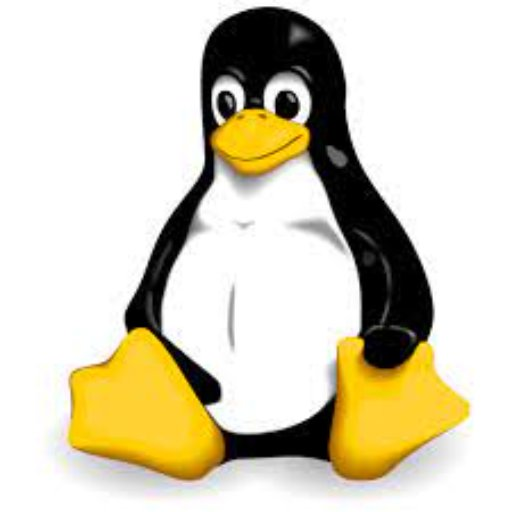

(512, 512, 3)


In [4]:
#Image do Linux --> https://drive.google.com/file/d/1LQd1FVImKcRjMlX4q81P8szswiX53o9b/view?usp=sharing
# Parte importante do link                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
download("1LQd1FVImKcRjMlX4q81P8szswiX53o9b")
linux = cv2.imread("linux.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(linux)
print(linux.shape)

Colocando em escala de cinza.


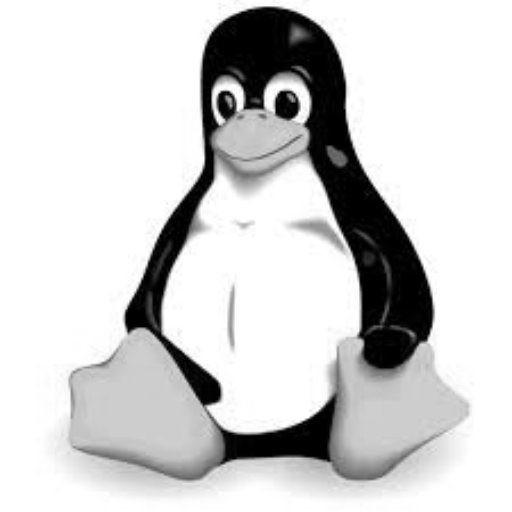

(512, 512)
2


In [5]:
def gray_scale(nameImage, comand):
  aux = cv2.imread("linux.jpg", cv2.IMREAD_GRAYSCALE)
  if comand=="imprima":
    cv2_imshow(aux)
    print(aux.shape)
    print(len(aux.shape))



  nameNew = "gray__" + nameImage
  Image.fromarray(aux).save(nameNew)

gray_scale("linux.jpg", "imprima")

###Função

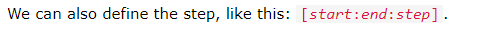

In [6]:
x =np.ones((2,2,0))
x.shape
x

array([], shape=(2, 2, 0), dtype=float64)

In [7]:
from PIL import Image
import cv2
import math
import numpy as np

class NNeighborInterpolation():
  def __init__(self, nameImage):
    self.nameImage = nameImage
    self.image = cv2.imread(self.nameImage, cv2.IMREAD_GRAYSCALE)
    if len(self.image.shape) == 2:
      self.rows, self.columns = self.image.shape
      self.channel = None
    else:
      self.rows, self.columns, self.channel = self.image.shape

  
  # def DownScaling(self, ratio, label="imprima"):

  #   rowNew = int(self.rows/ratio)
  #   columnNew = int(self.columns/ratio)

  #   newImage = np.zeros((rowNew, columnNew, self.channel))
  #   newImage[0:rowNew, 0:columnNew, :]  = self.image[0:self.rows:ratio, 0:self.columns:ratio ,:]

  #   newImage = newImage.astype(np.uint8)

  #   nameNew = "Reduce__"+ str(ratio)+"__" + self.nameImage
  #   Image.fromarray(newImage).save(nameNew)
    
  #   if label=="imprima":
  #     cv2_imshow(cv2.imread(nameNew, cv2.IMREAD_UNCHANGED))
  #     print(newImage.shape)

  def DownScaling_gray(self, ratio, label="imprima"):


    rowNew = int(self.rows/ratio)
    columnNew = int(self.columns/ratio)

    newImage = np.zeros((rowNew, columnNew))
    newImage[0:rowNew, 0:columnNew]  = self.image[0:self.rows:ratio, 0:self.columns:ratio]

    newImage = newImage.astype(np.uint8)

    nameNew = "Reduce__"+ str(ratio)+"__" + self.nameImage
    Image.fromarray(newImage).save(nameNew)
    
    if label=="imprima":
      cv2_imshow(cv2.imread(nameNew, cv2.IMREAD_UNCHANGED))
      print(newImage.shape)

  def UpperScaling_gray(self, ratio, label="imprima"):

    image = self.image

    rowOld, columnOld = self.rows, self.columns
    
    for j in range(1,int(math.log(ratio,2) + 1),1):
      # print(j)
      rowNew = int(self.rows*2**j)
      columnNew = int(self.columns*2**j)
      newImage = np.zeros((rowNew, columnNew))

      #Colocando os valores da imagem original no novo array imagem
      newImage[0:rowNew:2, 0:columnNew:2] = image[0:rowOld, 0:columnOld]

      #Eu substituo nos zeros os valores dos vizinhos de trás
      newImage[1:rowNew:2, 1:columnNew:2]  = image[0:rowOld, 0:columnOld]

      #Preparando para o próximo laço
      rowOld, columnOld = rowNew, columnNew
      image = newImage


    newImage = newImage.astype(np.uint8)

    nameNew = "Large__"+ str(ratio)+"__" + self.nameImage
    Image.fromarray(newImage).save(nameNew)
    
    if label=="imprima":
      cv2_imshow(cv2.imread(nameNew, cv2.IMREAD_UNCHANGED))
      print(newImage.shape)



###Resultados

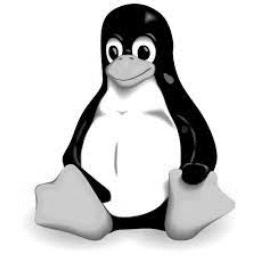

(256, 256)


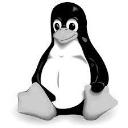

(128, 128)


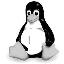

(64, 64)


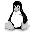

(32, 32)


In [8]:
inter = NNeighborInterpolation("gray__linux.jpg")

inter.DownScaling_gray(2 , "imprima")
inter.DownScaling_gray(4, "imprima")
inter.DownScaling_gray(8, "imprima")
inter.DownScaling_gray(16, "imprima")

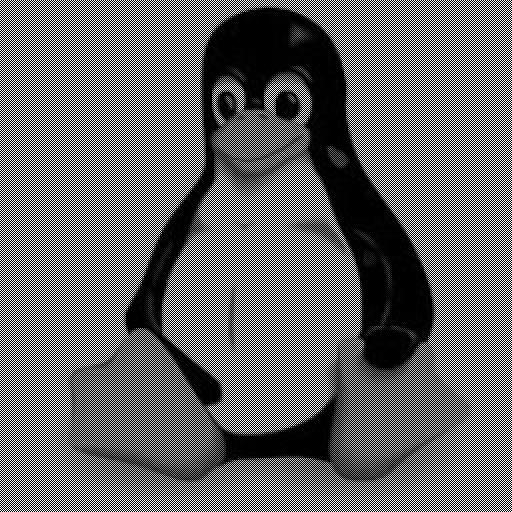

(512, 512)


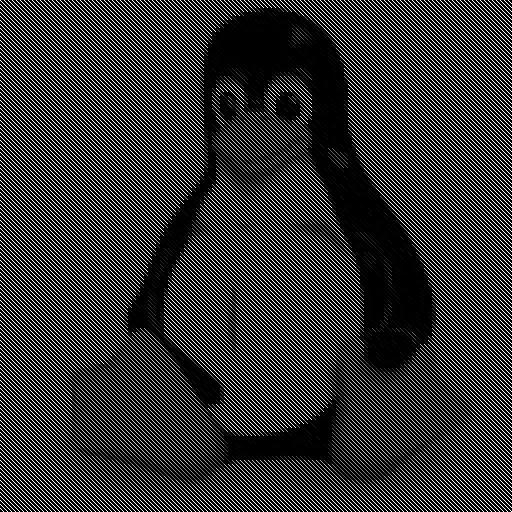

(512, 512)


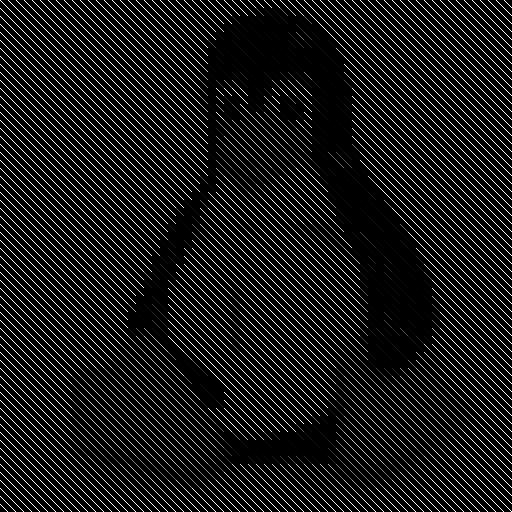

(512, 512)


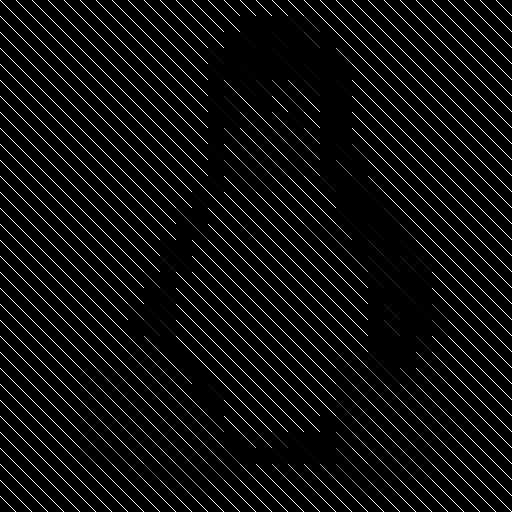

(512, 512)


In [9]:
inter = NNeighborInterpolation("Reduce__2__gray__linux.jpg")
inter.UpperScaling_gray(2, "imprima")

inter = NNeighborInterpolation("Reduce__4__gray__linux.jpg")
inter.UpperScaling_gray(4, "imprima")

inter = NNeighborInterpolation("Reduce__8__gray__linux.jpg")
inter.UpperScaling_gray(8, "imprima")

inter = NNeighborInterpolation("Reduce__16__gray__linux.jpg")
inter.UpperScaling_gray(16, "imprima")

In [10]:
#Código útil para o item 1.1


def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

imagem1 = cv2.imread("gray__linux.jpg", cv2.IMREAD_UNCHANGED)
imagem2 = cv2.imread("Large__16__Reduce__16__gray__linux.jpg", cv2.IMREAD_UNCHANGED)


calculate_psnr(imagem1, imagem2)

1.3723235672342535

**1.2** 

> Modifique a função desenvolvida em 1.1 de forma que ela utilize o algoritmo de interpolação **Bilinear**.  

> Novamente, utilize o seu programa para gerar imagens com resolução espacial reduzida por fatores de 2, 4, 8 e 16.  Em seguida, utilize o seu programa novamente para aumentar estas imagens de volta ao seu tamanho original.  Visualize todas as imagens obtidas, comente sobre as diferenças de qualidade  e calcule o PSNR entre a imagens originais e as imagens aumentadas (após a redução). 

> Bônus: Faça um gráfico dos valores de PSNR versus o tamanho da redução de resolução (2, 4, 8 e 16). 



In [11]:
# imagem = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]

# O parâmetro "image" que a funcão recebe já é um array, ver bloco [15]
def interpolation(imageName, ratio=2):

  image = cv2.imread(imageName, cv2.IMREAD_UNCHANGED)

  row, columns, sheets = image.shape
  rowNew = int(row/ratio)
  columnNew = int(columns/ratio)
  imageNew = np.zeros((rowNew, columnNew, sheets))

  print("Este é o novo shape da nova imagem", imageNew.shape)

  for layer in range(sheets):
    imageNew[:, :, layer] = interlayer(image[:, :, layer], ratio)

  imageNew = imageNew.astype(np.uint8)

  nameNew = "big" + imageName
  Image.fromarray(imageNew).save(nameNew)
  # imageNew.save(nameNew)

  aux = cv2.imread(nameNew, cv2.IMREAD_UNCHANGED)
  cv2_imshow(aux)



def interlayer(array, ratio):
  rows, columns = array.shape
  rowNew = int(rows/ratio)
  columnsNew = int(columns/ratio)
  new = np.zeros((rowNew, columnsNew)) # Essa função será chamada a cada canal, por isso duas dimensões
  
  #Move old points
  # new[0:rowNew:2, 0:columnsNew:2] = array[0:rowNew, 0:columnsNew]
  print(array.shape)

  print(new.shape)
  #Produzindo valores verticais
  #Start->Stop->Step    
  new[0:rows] = (array[0:rows:2, :] + array[1:rows:2, :])/2
  #Substitui-se os zeros fazendo a média dos valores das colunas
  new[:, 0:rowNew] = (array[:, 0:rows:2] + array[:, 1:rows-1:2])/2
  #Substitui-se os zeros fazendo a média dos valores das linhas

  return new

interpolation("linux.jpg")

Este é o novo shape da nova imagem (256, 256, 3)
(512, 512)
(256, 256)


ValueError: ignored

**1.3**

> Implemente a interpolação vizinho-mais-próximo e bilinear utilizando a função pronta do OpenCV (resize). Compare os resultados obtidos com a sua implementação e com a implementação do OpenCV. A comparação deve abranger o tempo de processamento das interpolações  e a PSNR da imagem. 

> Abaixo, é apresentado um exemplo da utilização da função resize do OpenCV e de um cronômetro para o código para cálculo do tempo de processamento.


In [ ]:
# Exemplo do uso da função resize
# Documentação em: https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize

import cv2
img = cv2.imread("testimage.png")
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
resized_linear = cv2.resize(img, (100,100), interpolation=cv2.INTER_LINEAR)
resized_near = cv2.resize(old_img, (100, 100), interpolation=cv2.INTER_NEAREST)


In [ ]:
#Documentação em: https://docs.python.org/3/library/time.html#time.time
# cronômetro

import time

t0 = time.time  ()
code_block
t1 = time.time()

total = t1-t0

## **Problema 2**: Entrelaçamento (5 pontos)







> Uma câmera de vídeo entrelaçado transmite uma imagem de resolução completa transmitindo primeiro as linhas ́ımpares (em um primeiro quadro) e,  em seguida,  as linhas pares (em um segundo quadro).   A imagem de resolução completa pode ser recuperada combinando-se os quadros pares e ímpares – ver figura abaixo.

> Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares. Considere, entretanto, que a câmera é defeituosa e que os defeitos só afetam os quadros pares. Nos quadros pares, as linhas de pixels aparecem deslocados pelo valor médio da linha (ou seja, o valor médio da linha foi subtraído das intensidades dos pixels da linha original). **O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.**

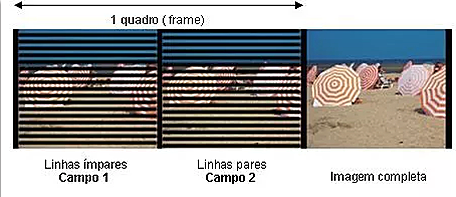

> Para resolver a questão, utilize as imagens em formato mat dos dois quadros (par e \'impar) estão nos endereços abaixo. O código para ler os arquivos mat é dado em seguida.  


*  [link campos pares](https://drive.google.com/file/d/1h4gsP4Wop17dthuh45NerdZJLCH-zt5U/view?usp=sharing)
*   [link campos ímpares](https://drive.google.com/file/d/1P6Z5ciRAh44jExv3sAKgo6WQZyq2it_z/view?usp=sharing)




In [ ]:
from scipy.io import loadmat
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_even = loadmat('even_rows.mat')
img_mateven = mat_even['even_corrupted_channel']

print('array da imagens de linhas pares:\n')
print('Tipo = ', img_mateven.dtype,'\n')
print('Media dos valores = ', img_mateven.mean(),'\n')
print('Valor Maximo = ', img_mateven.max(),'\n')
print('Valor Minimo = ', img_mateven.min(),'\n')
plt.imshow(img_mateven, cmap=plt.cm.gray)
plt.colorbar()
# Dando uma olhada nos dados da matriz de linhas pares
# perceba que a matriz possui valores negativos
# logo, se for salvar o arquivo, é necessário tratar a possível presença de 
# valores negativos!

# lendo os arquivos em mat da imagem de linhas pares e 
# transferindo apenas a matriz de dados do mat para um array
mat_odd = loadmat('odd_rows.mat')
img_matodd = mat_odd['odd_channel']
# Dando uma olhada nos dados da matriz de linhas ímpares
print('array da imagens de linhas ímpares:\n')
print('Tipo = ', img_matodd.dtype,'\n')
print('Media dos valores = ', img_matodd.mean(),'\n')
print('Valor Maximo = ', img_matodd.max(),'\n')
print('Valor Minimo = ', img_matodd.min(),'\n')
plt.imshow(img_matodd, cmap=plt.cm.gray)
plt.colorbar()


**2.1**   

>Elabore um programa para montar a imagem de resolução completa, a partir de quadros consecutivos formados por linhas ímpares e pares.

**2.2**   

>O seu programa deve corrigir esta pertubação de forma que a imagem de resoluão completa reconstruída não apresente defeitos perceptíveis.